In [1]:
# Importing necesssary Libraries 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# GaussianNM ---> Strucutured data (Numerical features/ continous feautres - Normally Distributed)
# Multinomia ---> Test classification (Frequency Counts)

In [5]:
#Downloaded from the kaggle - https://live.upgrad.com/_join/M9A2pw89xLfJbTJ6chD23b8xWu2FxG7w
data = pd.read_csv("diabetes.csv")

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.shape

(768, 9)

In [9]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

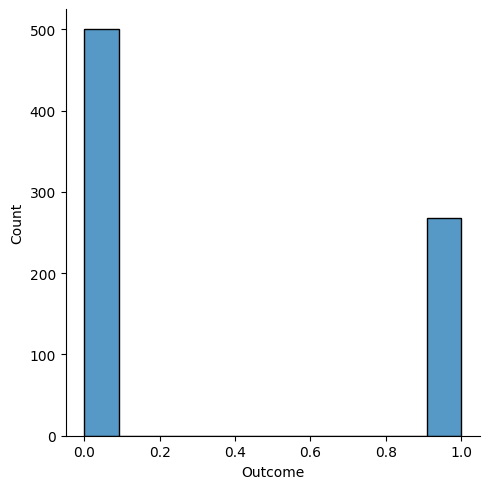

In [38]:
sns.displot(data["Outcome"])
plt.show()

In [28]:
X = data.drop('Outcome', axis =1) #Features

In [29]:
y = data["Outcome"] #target

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [39]:
# Initiate GaussianNB model
nb_model = GaussianNB()

In [40]:
# Fit and tranform the train data
nb_model.fit(X_train, y_train)

GaussianNB()

In [42]:
y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

In [44]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       401
           1       0.66      0.58      0.62       213

    accuracy                           0.75       614
   macro avg       0.73      0.71      0.72       614
weighted avg       0.75      0.75      0.75       614



In [43]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [45]:
## Text Classification - NLP(Natural language Probelm )

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
# Sample dataset: text and labels (spam or ham) 

texts = ["Free money now!!!", 
         "Congratulations! You've won a free gift card!", 
         "Urgent! Reply to claim your prize!", 
         "Exclusive offer for you!", 
         "Claim your free vacation today!", 
         "Win a brand new car! Click here to participate!", 
         "You have been selected for a $1,000 cash reward!", 
         "Limited time offer: Buy one, get one free!",
         "Don't miss out on this amazing deal!", 
         "Act now to secure your spot for this special promotion!", 
         "Hey, are we still meeting tomorrow?", 
         "Reminder about your appointment next week", 
         "Let's catch up later tonight.", 
         "This is not a spam message.", 
         "Did you see the game last night? It was amazing!", 
         "Can you send me the notes from yesterday’s class?", 
         "Looking forward to seeing you at the party!", 
         "Don't forget to pick up some groceries on your way home.", 
         "Let me know if you need help with your project.", 
         "Thanks for the great dinner last night",
        ]

# texts = [ "Free money now!!!", 
#          "Hey, are we still meeting tomorrow?", 
#          "Congratulations! You've won a free gift card!", 
#          "Reminder about your appointment next week", 
#          "Urgent! Reply to claim your prize!", 
#          "Let's catch up later tonight.", 
#          "Exclusive offer for you!", 
#          "This is not a spam message.",
#          "Are you free now?"
#         ] 
# Corresponding labels: 1 for spam, 0 for ham 
labels = [1, 1, 1, 1, 1, 1, 1, 1 , 1 ,1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [92]:
vectorizer = CountVectorizer()

In [93]:
X = vectorizer.fit_transform(texts)

In [94]:
pd.set_option("display.max_columns", None)
cols = vectorizer.get_feature_names_out()
pd.DataFrame(X.toarray(), columns=cols)

,000,about,act,amazing,appointment,are,at,been,brand,buy,can,car,card,cash,catch,claim,class,click,congratulations,deal,did,dinner,don,exclusive,for,forget,forward,free,from,game,get,gift,great,groceries,have,help,here,hey,home,if,is,it,know,last,later,let,limited,looking,me,meeting,message,miss,money,need,new,next,night,not,notes,now,offer,on,one,out,participate,party,pick,prize,project,promotion,reminder,reply,reward,secure,see,seeing,selected,send,some,spam,special,spot,still,thanks,the,this,time,to,today,tomorrow,tonight,up,urgent,vacation,ve,was,way,we,week,win,with,won,yesterday,you,your
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [96]:
nb_classifier = MultinomialNB()

In [97]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [98]:
y_pred_train = nb_classifier.predict(X_train)
y_pred_test = nb_classifier.predict(X_test)

In [99]:
accuracy_train = accuracy_score(y_train, y_pred_train)

In [100]:
print(accuracy_train)

1.0


In [101]:
accuracy_test = accuracy_score(y_test, y_pred_test)

In [102]:
print(accuracy_test)

0.75
